In [20]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Data Preprocessing:

## Load and inspect the dataset

In [2]:
df = pd.read_csv('AirQuality.csv', sep = ";", decimal = ",")

In [3]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


## Check for missing values and handle them appropriately.

In [4]:
print("Value of Unnamed:15", df["Unnamed: 15"].unique())
print("Value of Unnamed:16", df["Unnamed: 16"].unique())


Value of Unnamed:15 [nan]
Value of Unnamed:16 [nan]


Because columns "Unnamed:15" and "Unnamed:16" have no value, so we can drop there columns

In [5]:
df.drop(['Unnamed: 15','Unnamed: 16'], axis=1, inplace=True, errors = 'ignore') 
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [6]:
df.replace(to_replace = -200, value = np.nan, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         7674 non-null   float64
 3   PT08.S1(CO)    8991 non-null   float64
 4   NMHC(GT)       914 non-null    float64
 5   C6H6(GT)       8991 non-null   float64
 6   PT08.S2(NMHC)  8991 non-null   float64
 7   NOx(GT)        7718 non-null   float64
 8   PT08.S3(NOx)   8991 non-null   float64
 9   NO2(GT)        7715 non-null   float64
 10  PT08.S4(NO2)   8991 non-null   float64
 11  PT08.S5(O3)    8991 non-null   float64
 12  T              8991 non-null   float64
 13  RH             8991 non-null   float64
 14  AH             8991 non-null   float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB


Collumn "NMHC(GT)" has number of null value 914 on 9471 tuples of dataset. So, we drop this collumnand tuples where has null value

In [7]:

df.drop(['NMHC(GT)'], axis=1, inplace=True, errors = 'ignore') 
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6941 entries, 0 to 9356
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           6941 non-null   object 
 1   Time           6941 non-null   object 
 2   CO(GT)         6941 non-null   float64
 3   PT08.S1(CO)    6941 non-null   float64
 4   C6H6(GT)       6941 non-null   float64
 5   PT08.S2(NMHC)  6941 non-null   float64
 6   NOx(GT)        6941 non-null   float64
 7   PT08.S3(NOx)   6941 non-null   float64
 8   NO2(GT)        6941 non-null   float64
 9   PT08.S4(NO2)   6941 non-null   float64
 10  PT08.S5(O3)    6941 non-null   float64
 11  T              6941 non-null   float64
 12  RH             6941 non-null   float64
 13  AH             6941 non-null   float64
dtypes: float64(12), object(2)
memory usage: 813.4+ KB


## Convert date and time columns to datetime format

In [8]:
df['DateTime'] =  (df.Date) + ' ' + (df.Time)
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%d/%m/%Y %H.%M.%S')
df.head()

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,DateTime
0,10/03/2004,18.00.00,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,2004-03-10 18:00:00
1,10/03/2004,19.00.00,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,2004-03-10 19:00:00
2,10/03/2004,20.00.00,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,2004-03-10 20:00:00
3,10/03/2004,21.00.00,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,2004-03-10 21:00:00
4,10/03/2004,22.00.00,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,2004-03-10 22:00:00


We can drop "Date" and "Time" collumn

In [9]:
df.drop(['Date','Time'], axis=1, inplace=True, errors = 'ignore') 

In [10]:
df.head()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,DateTime
0,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,2004-03-10 18:00:00
1,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,2004-03-10 19:00:00
2,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,2004-03-10 20:00:00
3,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,2004-03-10 21:00:00
4,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,2004-03-10 22:00:00


# EDA

## Visualize the distribution of air pollutants

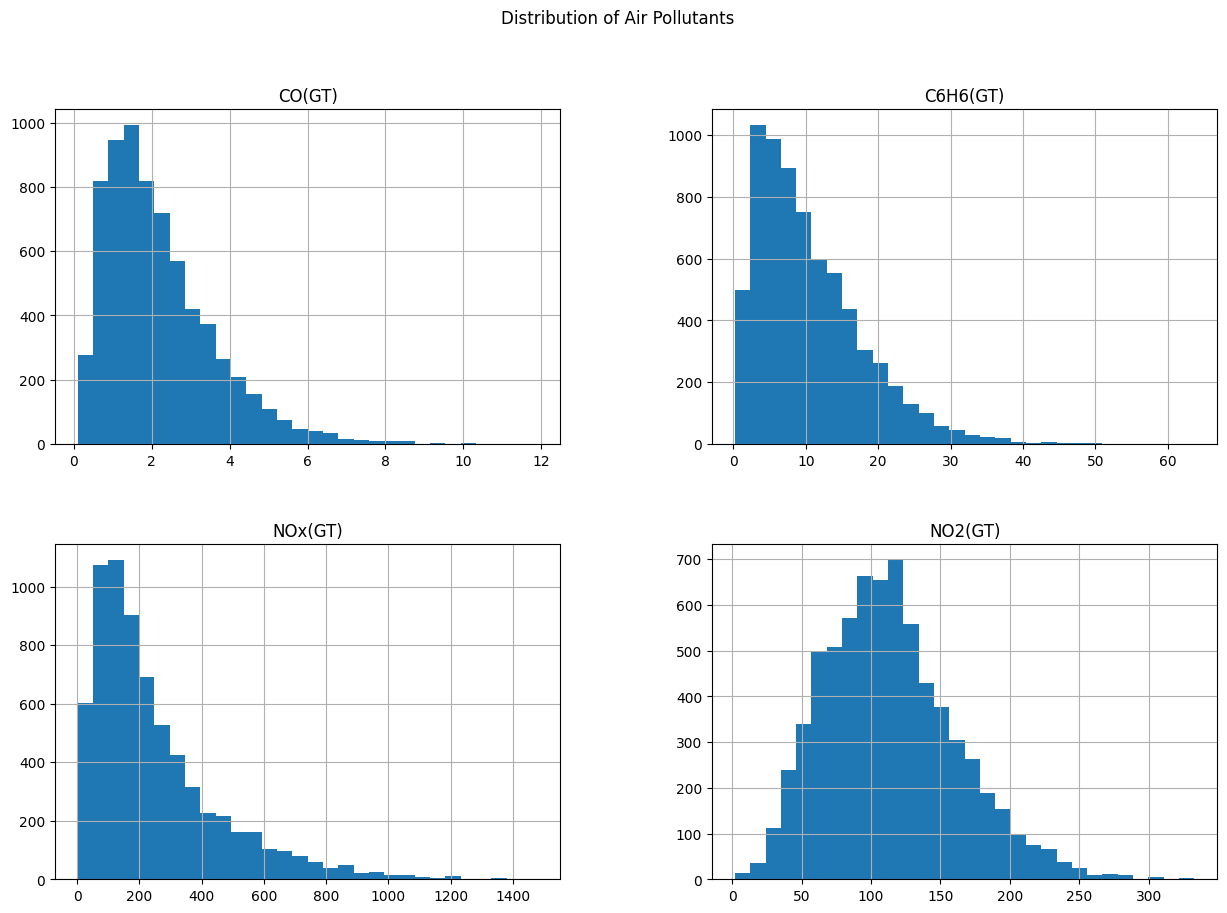

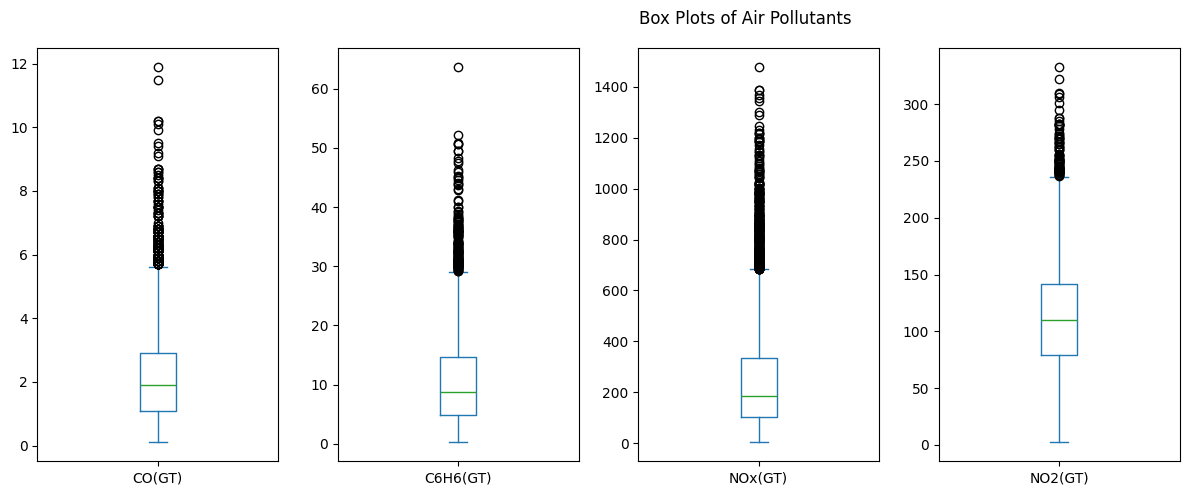

In [11]:
pollutants = ['CO(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)']

df[pollutants].hist(bins=30, figsize=(15, 10))
plt.suptitle('Distribution of Air Pollutants')
plt.show()

df[pollutants].plot(kind='box', subplots=True, layout=(1, 5), figsize=(15, 5), title='Box Plots of Air Pollutants')
plt.tight_layout()
plt.show()

## Explore correlations between sensor responses and ground truth concentrations.

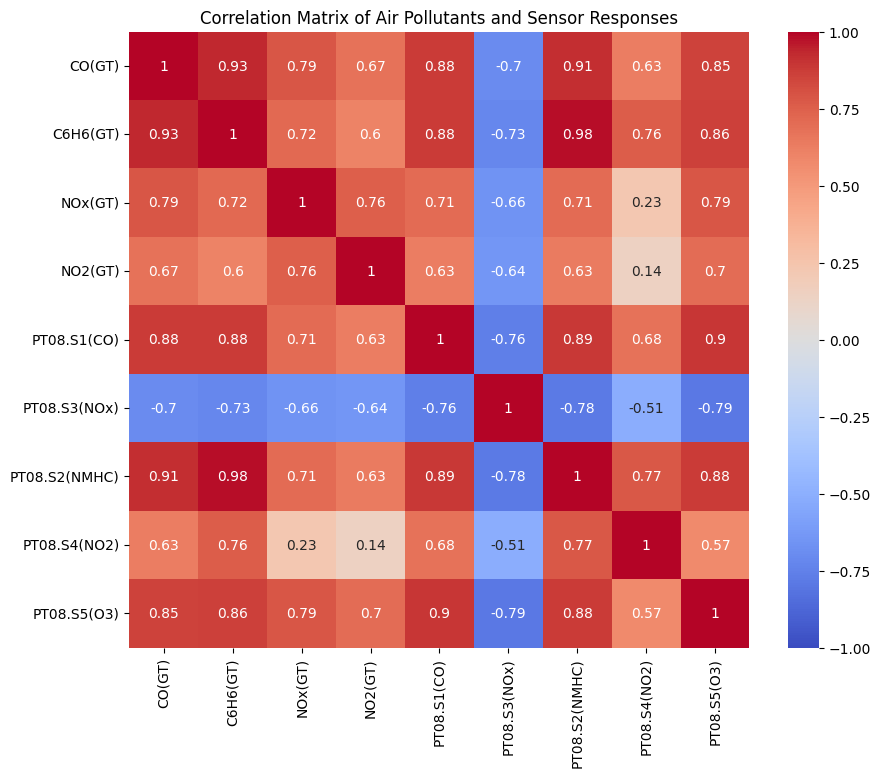

In [12]:
# List of sensor responses
sensors = ['PT08.S1(CO)','PT08.S3(NOx)','PT08.S2(NMHC)', 'PT08.S4(NO2)', 'PT08.S5(O3)']

# Correlation matrix
corr_matrix = df[pollutants + sensors].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Air Pollutants and Sensor Responses')
plt.show()

## Examine the effects of temperature, humidity, and absolute humidity on air quality.

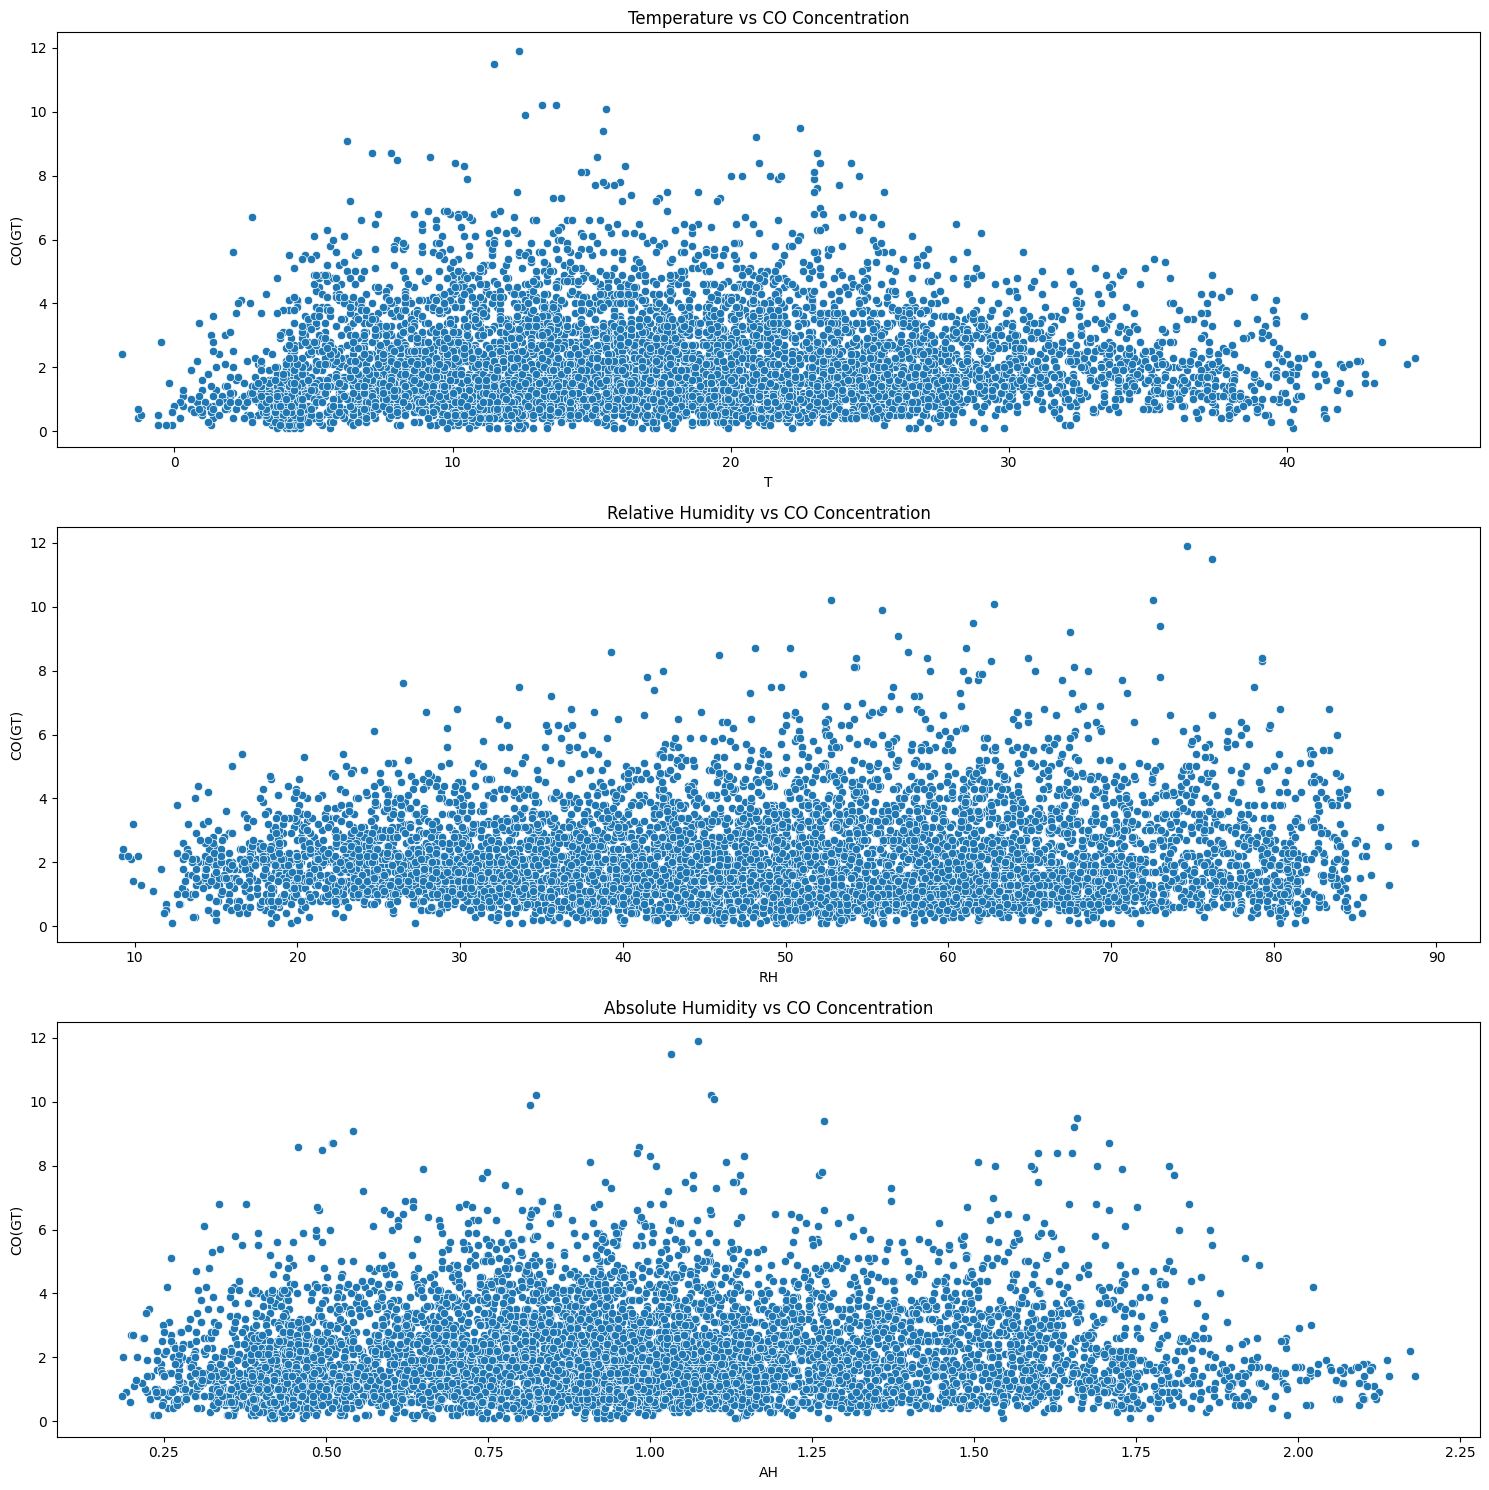

In [17]:
# Scatter plots
fig, axs = plt.subplots(3, 1, figsize=(15, 15))
sns.scatterplot(x='T', y='CO(GT)', data=df, ax=axs[0])
sns.scatterplot(x='RH', y='CO(GT)', data=df, ax=axs[1])
sns.scatterplot(x='AH', y='CO(GT)', data=df, ax=axs[2])
axs[0].set_title('Temperature vs CO Concentration')
axs[1].set_title('Relative Humidity vs CO Concentration')
axs[2].set_title('Absolute Humidity vs CO Concentration')
plt.tight_layout()
plt.show()


# Data Split

In [18]:


feature_columns = ['PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']
target_columns = ['CO(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)']

X = df[feature_columns]
y = df[target_columns]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Modeling

## Random Forest Regression

In [25]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## Linear Regression

In [26]:
lr_model = LinearRegression()

lr_model.fit(X_train, y_train)

LinearRegression()

## Gradient Boosting Regression

In [27]:
gb_models = {target: GradientBoostingRegressor(n_estimators=100, random_state=42) for target in target_columns}

for target in target_columns:
    gb_models[target].fit(X_train, y_train[target])

# Model Evaluation:

## Model evaluation

In [31]:
# Evaluate the models
def evaluate_model(y_test, y_pred, model_name):
    results = {}
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results['Model'] = model_name
    results['Overall_MSE'] = mse
    results['Overall_MAE'] = mae
    results['Overall_R2'] = r2
    
    for i, pollutant in enumerate(target_columns):
        pollutant_mse = mean_squared_error(y_test.iloc[:, i], y_pred[:, i])
        pollutant_mae = mean_absolute_error(y_test.iloc[:, i], y_pred[:, i])
        pollutant_r2 = r2_score(y_test.iloc[:, i], y_pred[:, i])

        results[f'{pollutant}_MSE'] = pollutant_mse
        results[f'{pollutant}_MAE'] = pollutant_mae
        results[f'{pollutant}_R2'] = pollutant_r2

    return results

In [32]:
y_pred_rf = rf_model.predict(X_test)
y_pred_lr = lr_model.predict(X_test)
y_pred_gb = np.column_stack([gb_models[target].predict(X_test) for target in target_columns])

results_rf = evaluate_model(y_test, y_pred_rf, "Random Forest")
results_lr = evaluate_model(y_test, y_pred_lr, "Linear Regression")
results_gb = evaluate_model(y_test, y_pred_gb, "Gradient Boosting")

results_df = pd.DataFrame([results_rf, results_lr, results_gb])

In [33]:
results_df

,Model,Overall_MSE,Overall_MAE,Overall_R2,CO(GT)_MSE,CO(GT)_MAE,CO(GT)_R2,C6H6(GT)_MSE,C6H6(GT)_MAE,C6H6(GT)_R2,NOx(GT)_MSE,NOx(GT)_MAE,NOx(GT)_R2,NO2(GT)_MSE,NO2(GT)_MAE,NO2(GT)_R2
0,Random Forest,916.617796,12.534235,0.914134,0.170521,0.266520,0.916442,0.960069,0.432362,0.983164,3317.497875,35.993505,0.916984,347.842721,13.444551,0.839945
1,Linear Regression,1978.297757,19.655923,0.853300,0.233622,0.318920,0.885521,1.531918,0.876781,0.973135,7342.644690,59.726930,0.816260,568.780798,17.701061,0.738284
2,Gradient Boosting,1153.662237,14.707112,0.906148,0.167607,0.268008,0.917870,0.083706,0.057837,0.998532,4209.118558,43.615913,0.894673,405.279078,14.886690,0.813517


## Visual model prediction

### Visual model predictions vs. actual values (sorted by value magnitude (min-> max))

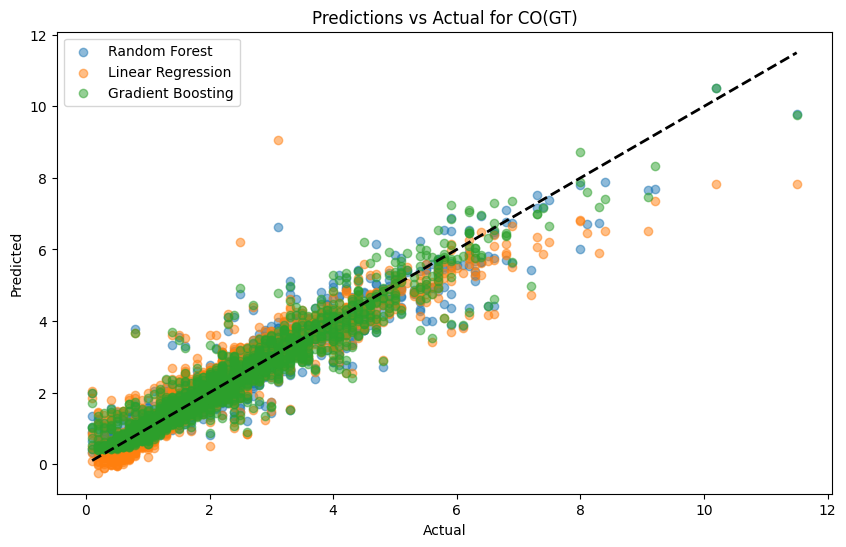

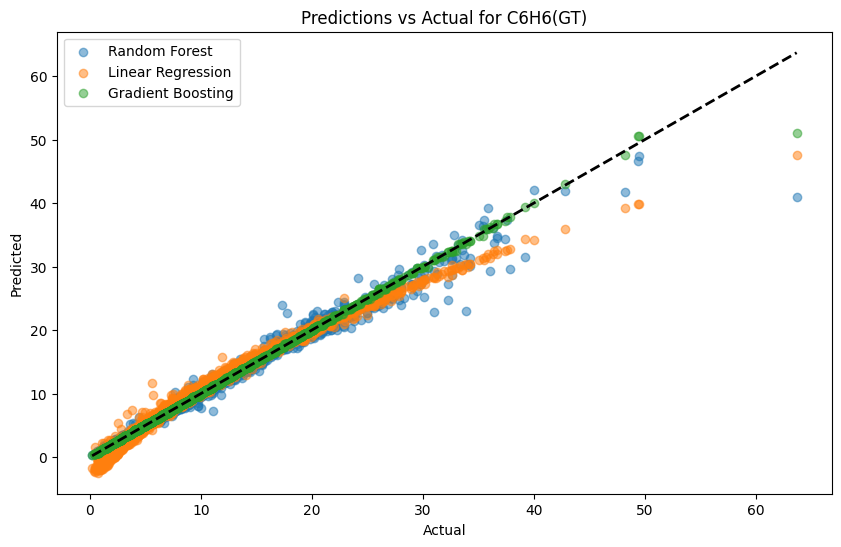

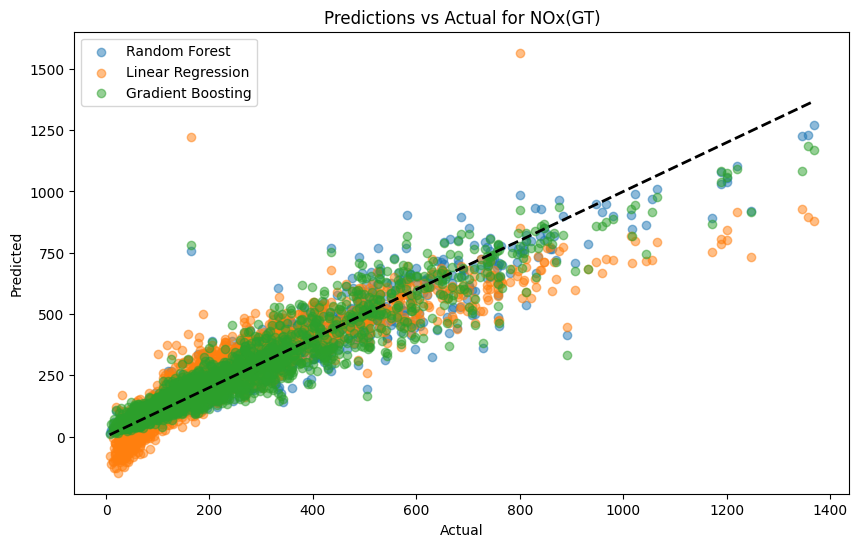

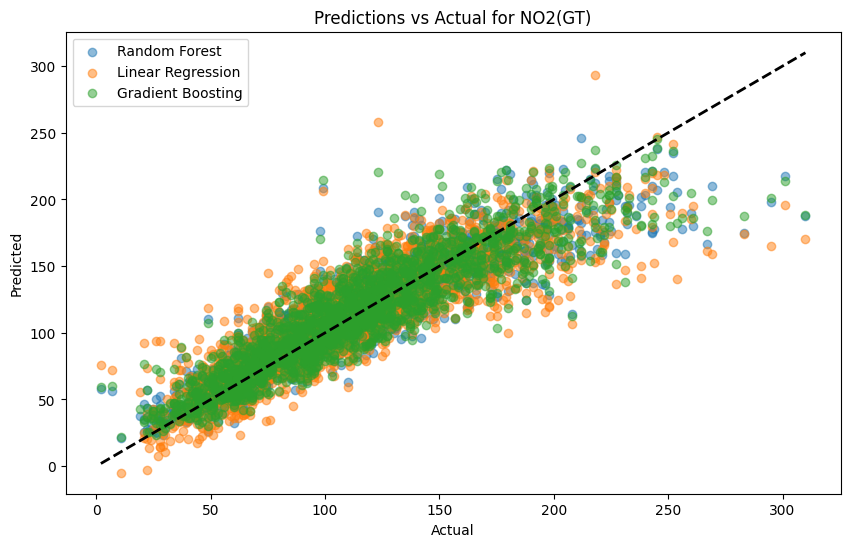

In [38]:
# Visualize the model's predictions vs. actual values for one target variable
def plot_predictions_for_target_1(y_test, y_pred_rf, y_pred_lr, y_pred_gb, target, target_index):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test.iloc[:, target_index], y_pred_rf[:, target_index], alpha=0.5, label='Random Forest')
    plt.scatter(y_test.iloc[:, target_index], y_pred_lr[:, target_index], alpha=0.5, label='Linear Regression')
    plt.scatter(y_test.iloc[:, target_index], y_pred_gb[:, target_index], alpha=0.5, label='Gradient Boosting')
    plt.plot([y_test.iloc[:, target_index].min(), y_test.iloc[:, target_index].max()],
             [y_test.iloc[:, target_index].min(), y_test.iloc[:, target_index].max()], 'k--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Predictions vs Actual for {target}')
    plt.legend()
    plt.show()

# Plot predictions for each target variable
for i, target in enumerate(target_columns):
    plot_predictions_for_target_1(y_test, y_pred_rf, y_pred_lr, y_pred_gb, target, i)

### Visualize the model's predictions vs. actual with each model

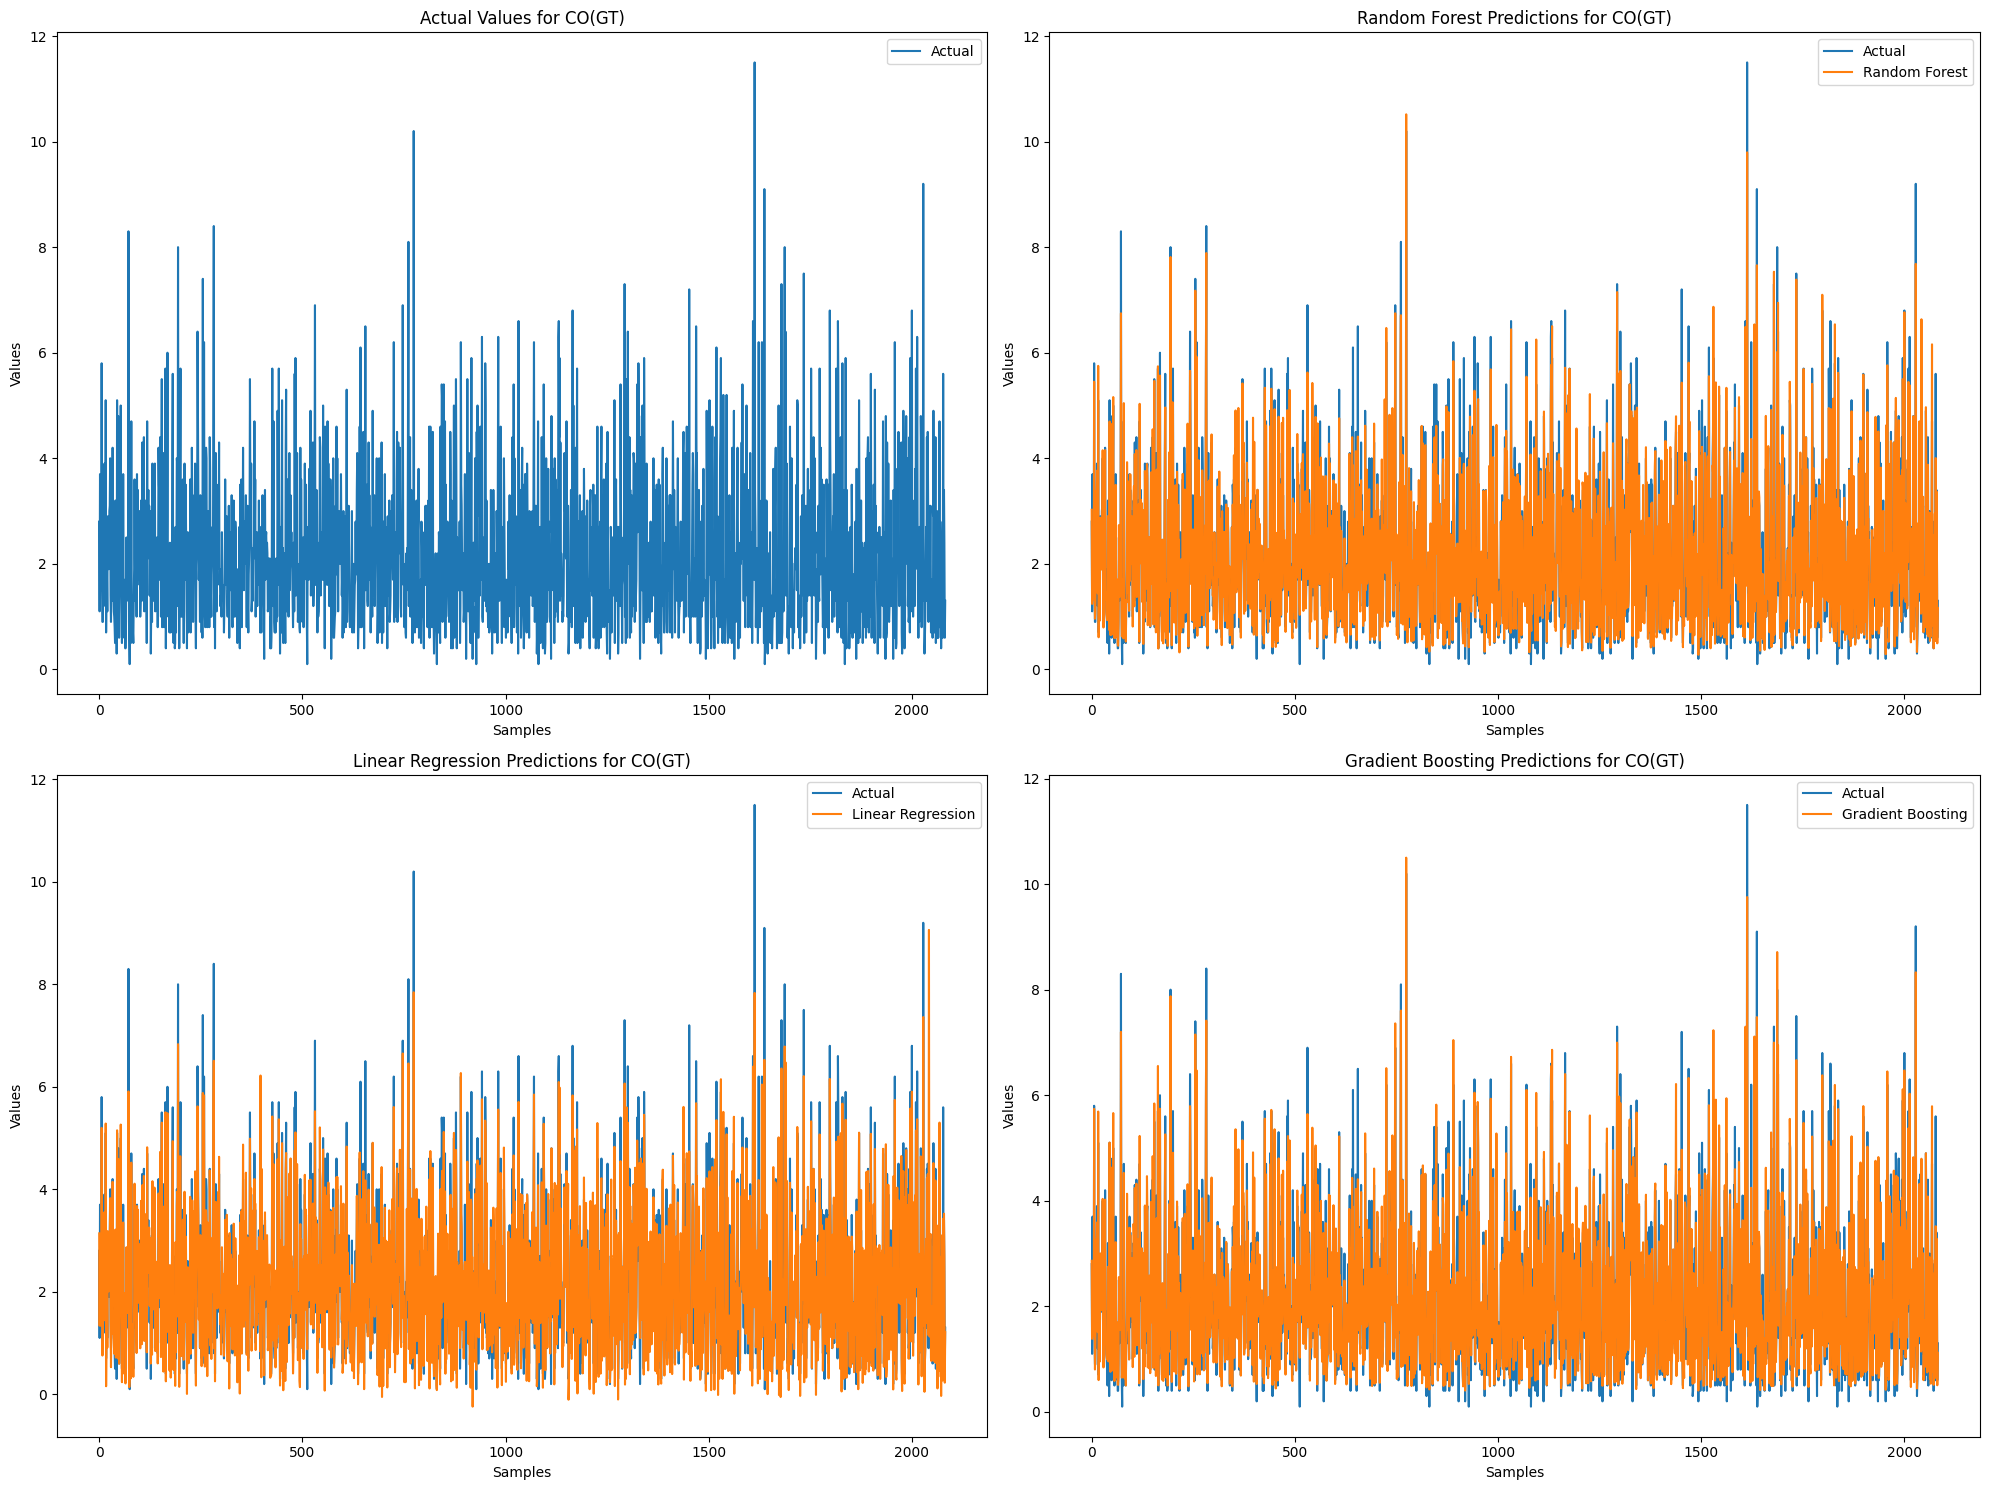

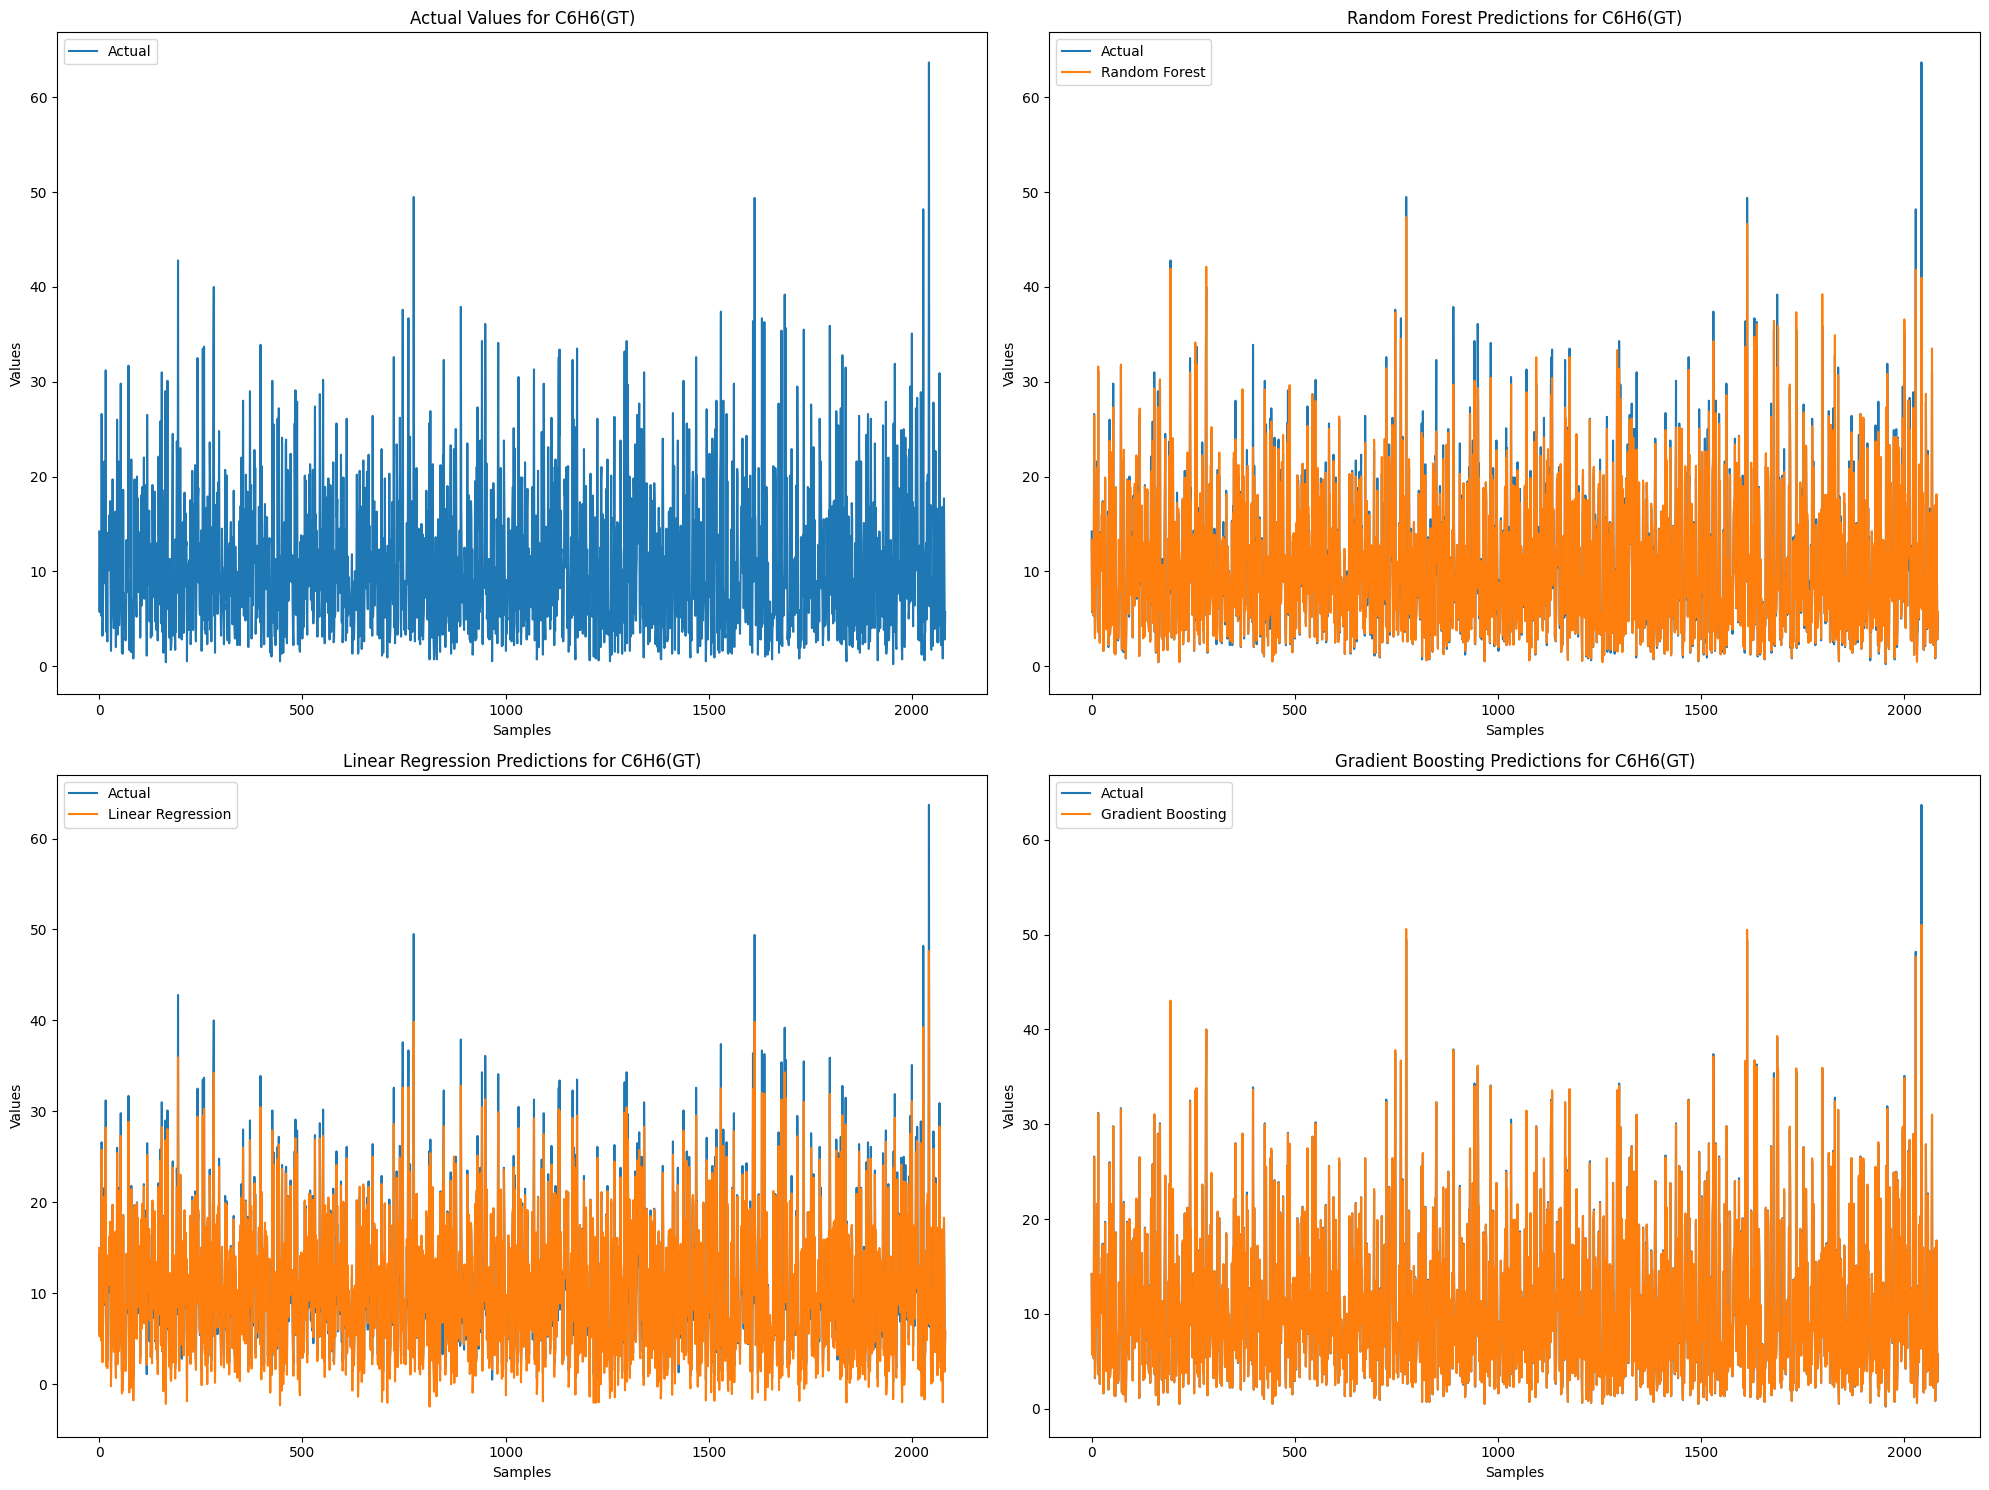

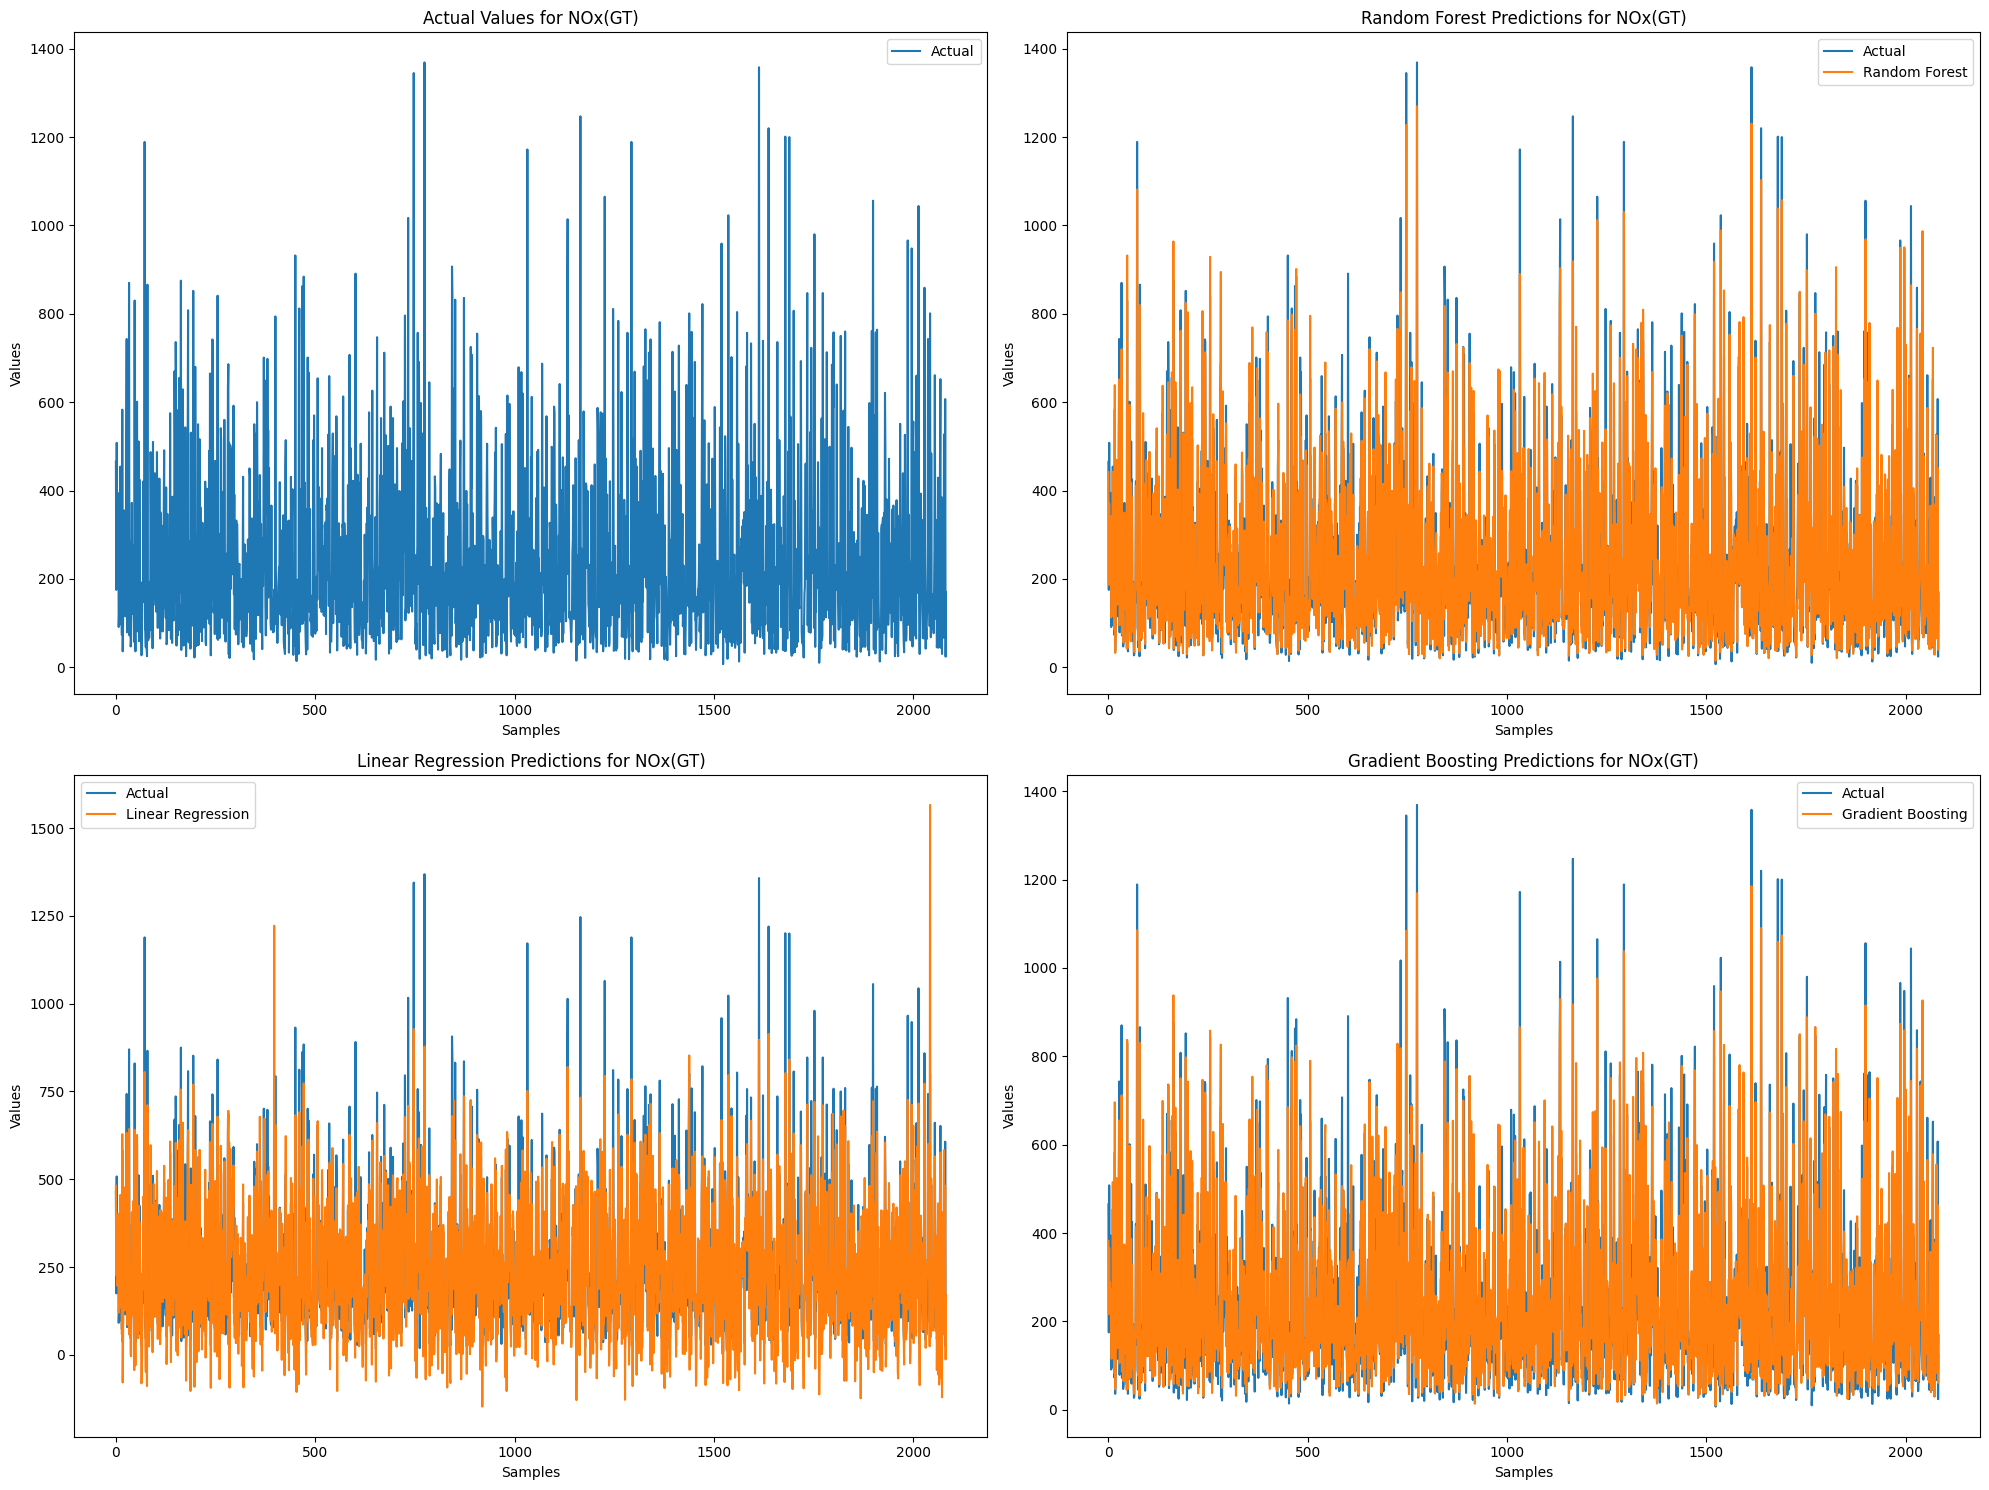

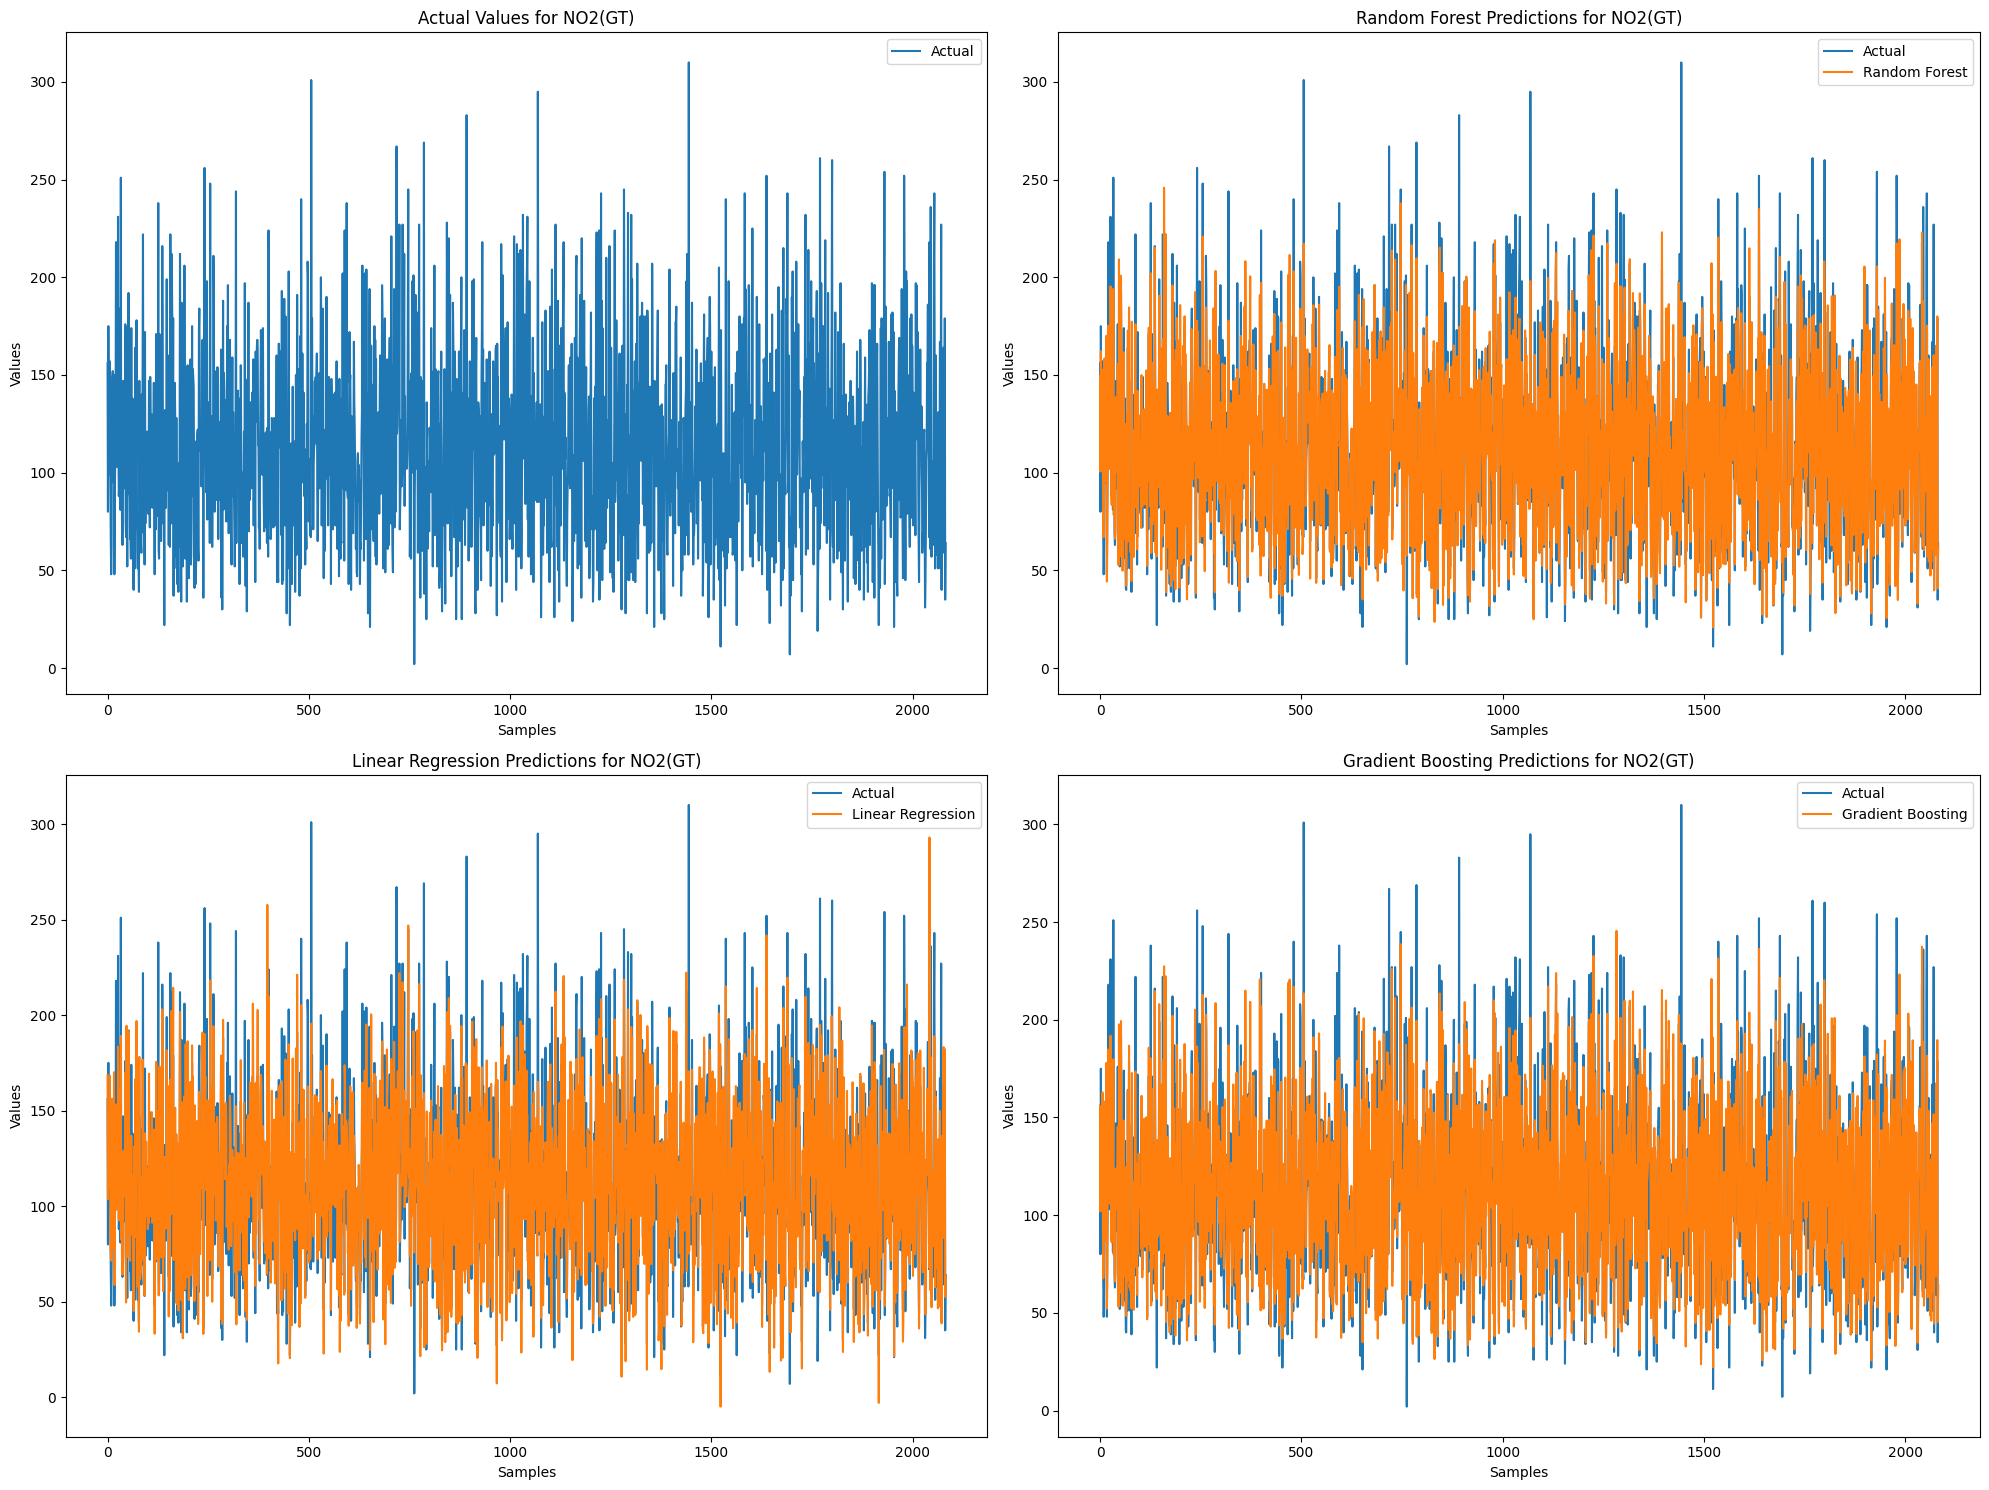

In [39]:
# Visualize the model's predictions vs. actual values for each target variable
def plot_predictions_for_target_2(y_test, y_pred_rf, y_pred_lr, y_pred_gb, target, target_index):
    plt.figure(figsize=(20, 15))

    # Actual values
    plt.subplot(2, 2, 1)
    plt.plot(y_test.iloc[:, target_index].values, label='Actual')
    plt.title(f'Actual Values for {target}')
    plt.xlabel('Samples')
    plt.ylabel('Values')
    plt.legend()

    # Random Forest predictions
    plt.subplot(2, 2, 2)
    plt.plot(y_test.iloc[:, target_index].values, label='Actual')
    plt.plot(y_pred_rf[:, target_index], label='Random Forest')
    plt.title(f'Random Forest Predictions for {target}')
    plt.xlabel('Samples')
    plt.ylabel('Values')
    plt.legend()

    # Linear Regression predictions
    plt.subplot(2, 2, 3)
    plt.plot(y_test.iloc[:, target_index].values, label='Actual')
    plt.plot(y_pred_lr[:, target_index], label='Linear Regression')
    plt.title(f'Linear Regression Predictions for {target}')
    plt.xlabel('Samples')
    plt.ylabel('Values')
    plt.legend()

    # Gradient Boosting predictions
    plt.subplot(2, 2, 4)
    plt.plot(y_test.iloc[:, target_index].values, label='Actual')
    plt.plot(y_pred_gb[:, target_index], label='Gradient Boosting')
    plt.title(f'Gradient Boosting Predictions for {target}')
    plt.xlabel('Samples')
    plt.ylabel('Values')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot predictions for each target variable
for i, target in enumerate(target_columns):
    plot_predictions_for_target_2(y_test, y_pred_rf, y_pred_lr, y_pred_gb, target, i)

# Model performance

## Visualize Performance Metrics

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4068\2240888216.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[row, col].set_xticklabels(results_df['Model'], rotation=45, ha='right')
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4068\2240888216.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[row, col].set_xticklabels(results_df['Model'], rotation=45, ha='right')
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4068\2240888216.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[row, col].set_xticklabels(results_df['Model'], rotation=45, ha='right')
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4068\2240888216.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a 

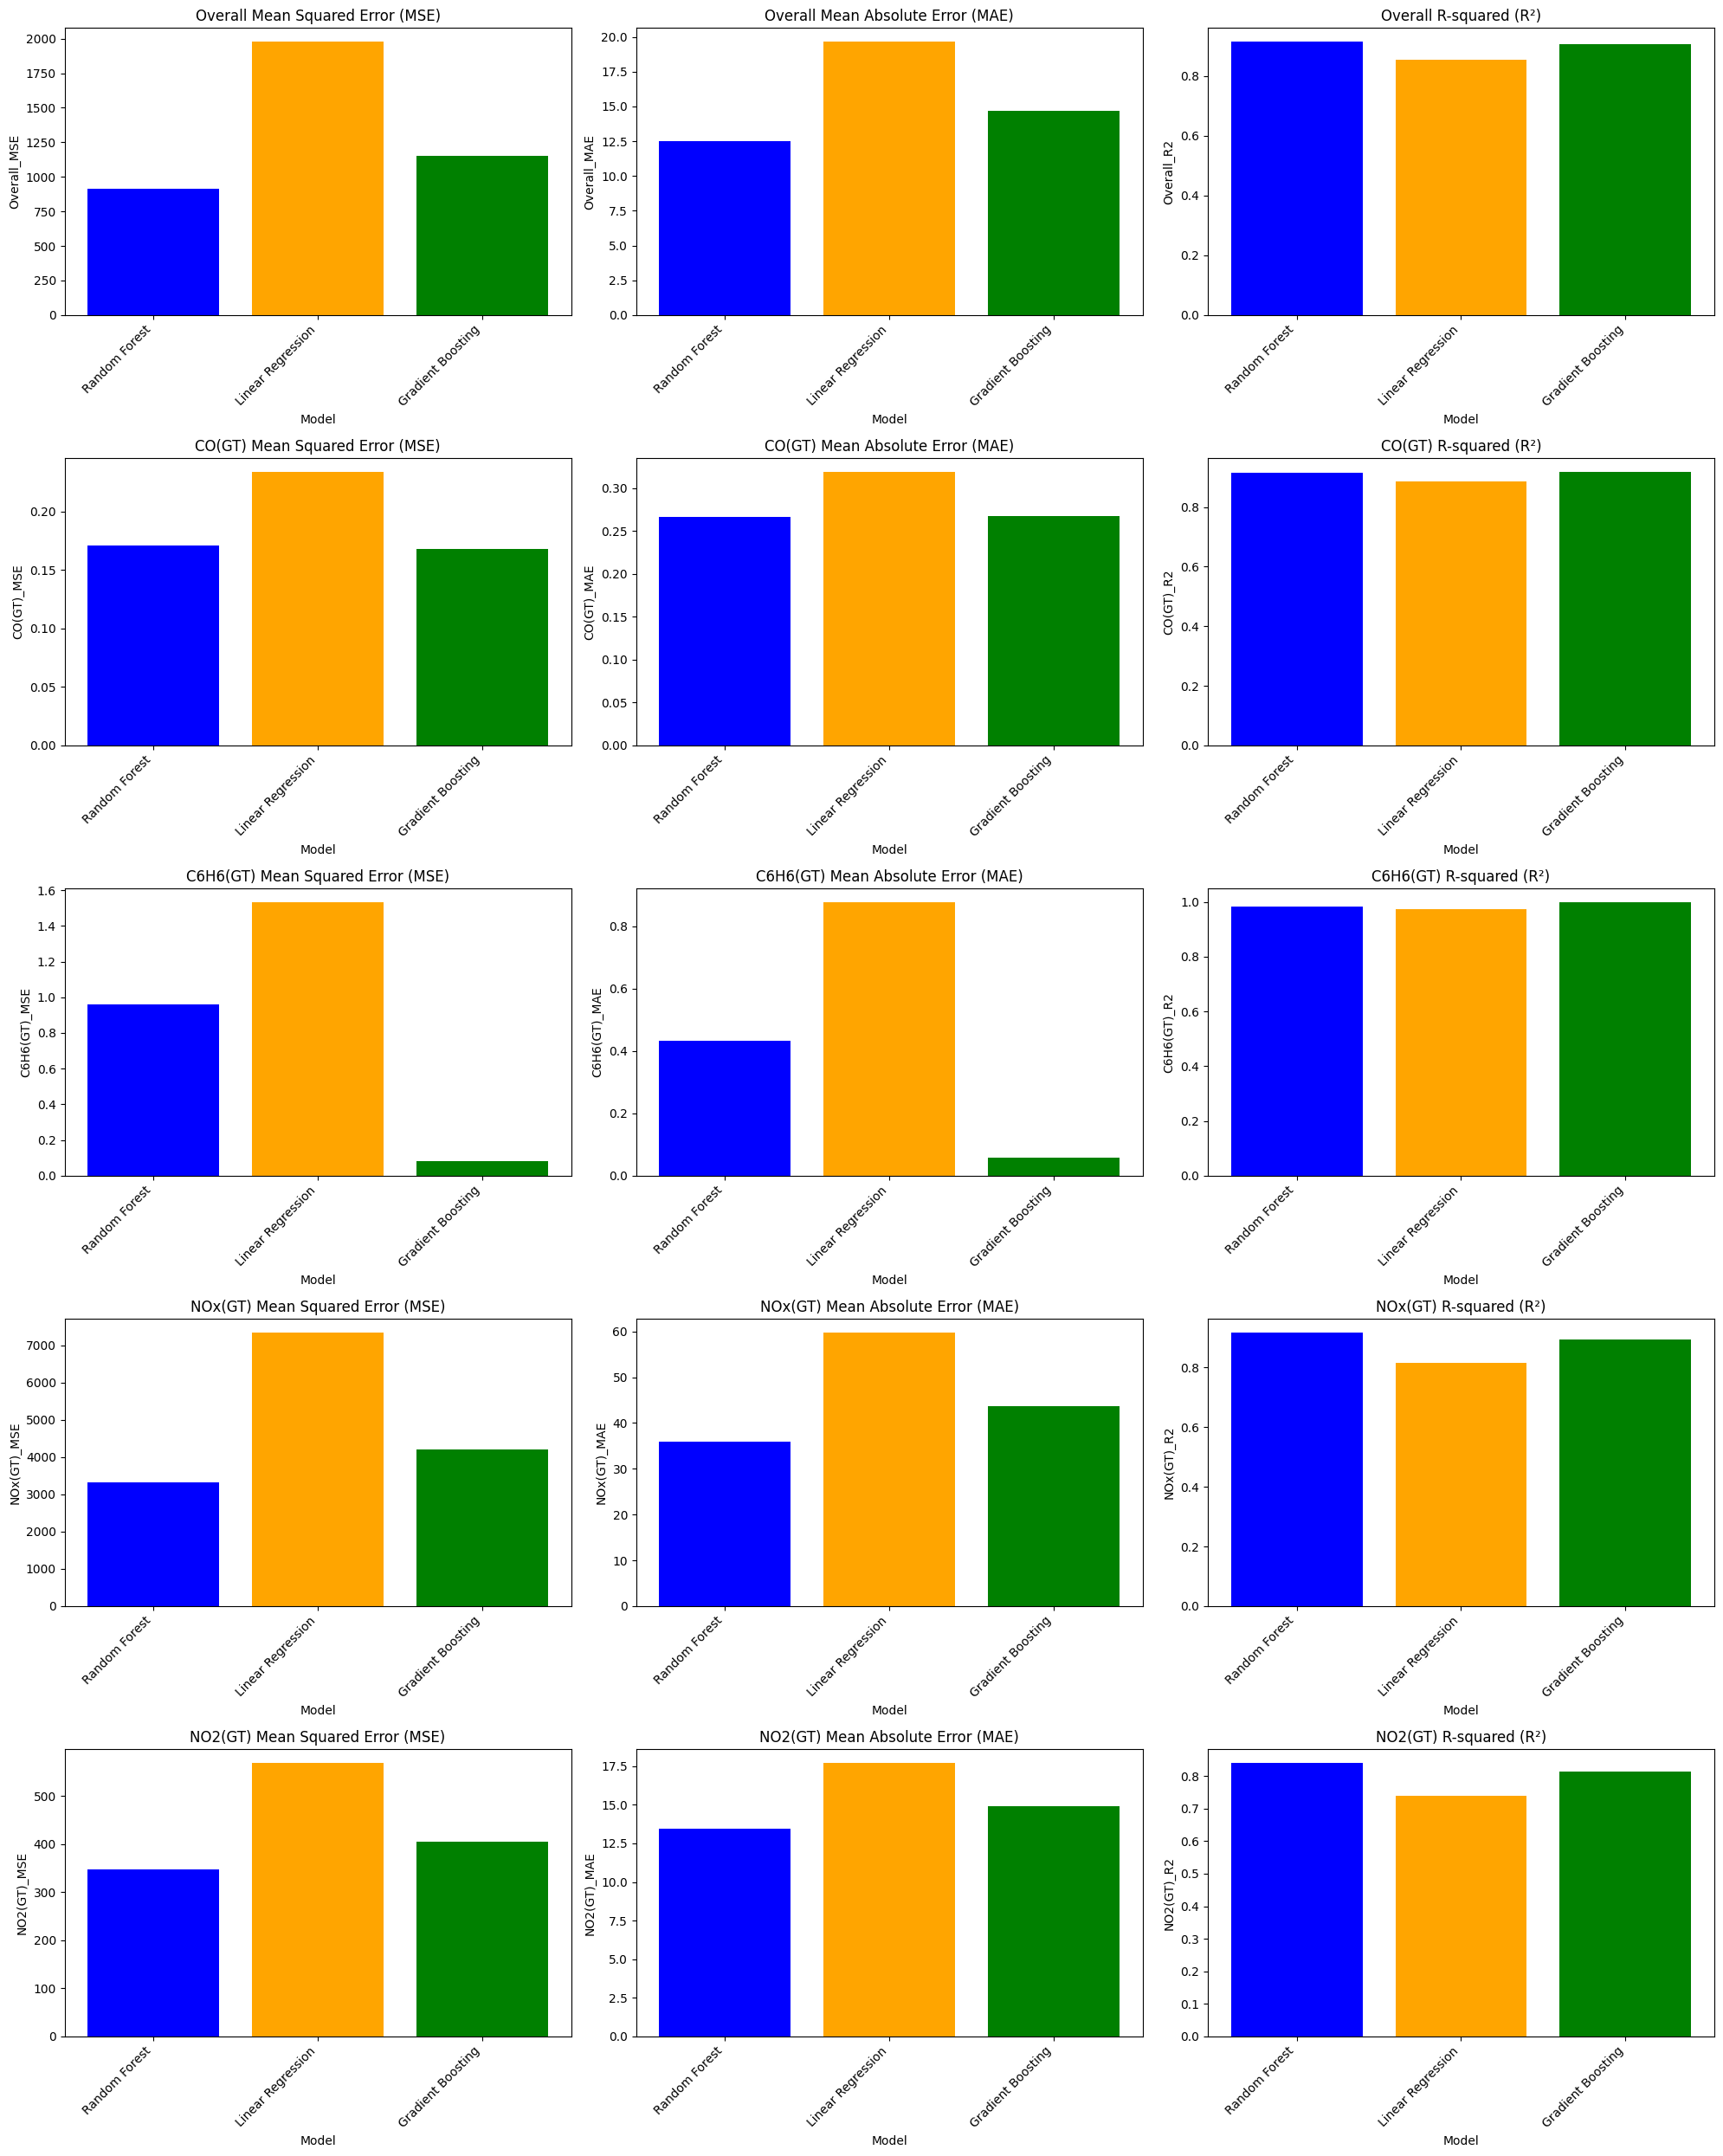

In [47]:
# Metrics to be plotted
metrics = ['Overall_MSE', 'Overall_MAE', 'Overall_R2',
           'CO(GT)_MSE', 'CO(GT)_MAE', 'CO(GT)_R2',
           'C6H6(GT)_MSE', 'C6H6(GT)_MAE', 'C6H6(GT)_R2',
           'NOx(GT)_MSE', 'NOx(GT)_MAE', 'NOx(GT)_R2',
           'NO2(GT)_MSE', 'NO2(GT)_MAE', 'NO2(GT)_R2']

titles = ['Overall Mean Squared Error (MSE)', 'Overall Mean Absolute Error (MAE)', 'Overall R-squared (R²)',
          'CO(GT) Mean Squared Error (MSE)', 'CO(GT) Mean Absolute Error (MAE)', 'CO(GT) R-squared (R²)',
          'C6H6(GT) Mean Squared Error (MSE)', 'C6H6(GT) Mean Absolute Error (MAE)', 'C6H6(GT) R-squared (R²)',
          'NOx(GT) Mean Squared Error (MSE)', 'NOx(GT) Mean Absolute Error (MAE)', 'NOx(GT) R-squared (R²)',
          'NO2(GT) Mean Squared Error (MSE)', 'NO2(GT) Mean Absolute Error (MAE)', 'NO2(GT) R-squared (R²)']

# Create subplots
fig, axs = plt.subplots(5, 3, figsize=(20, 25))

for i, (metric, title) in enumerate(zip(metrics, titles)):
    row = i // 3
    col = i % 3
    axs[row, col].bar(results_df['Model'], results_df[metric], color=['blue', 'orange', 'green'])
    axs[row, col].set_title(title)
    axs[row, col].set_xlabel('Model')
    axs[row, col].set_ylabel(metric)
    axs[row, col].set_xticklabels(results_df['Model'], rotation=45, ha='right')

# Adjust layout
plt.tight_layout()
plt.show()

## Recommendations

- Best Overall Model: The Random Forest model exhibited the best overall performance with an R² of 0.91 and the lowest MSE and MAE among the three models. This model is recommended for predicting air pollutant concentrations.

- Gradient Boosting Model: While slightly behind Random Forest, the Gradient Boosting model also showed strong performance with an overall R² of 0.91. It achieved the highest R² for C6H6(GT) and should be considered for scenarios where high precision for this specific pollutant is required.

- Linear Regression Model: The Linear Regression model had the lowest overall performance with an R² of 0.85. It is less suitable for predicting air pollutant concentrations compared to the other models and should be used with caution.